# EDA

Elegimos la base de datos de **Adult Income (Census Income)** porque se ajusta a nuestro nivel de conocimiento y a las herramientas que dominamos. A diferencia de conjuntos más complejos, como los de visión por computadora o procesamiento de lenguaje natural, esta base combina variables demográficas y laborales que son más fáciles de interpretar y manipular. Esto nos permite aplicar con seguridad técnicas de análisis exploratorio, clasificación y evaluación de sesgos, obteniendo resultados significativos y útiles sin necesidad de recurrir a metodologías demasiado especializadas.

## Importar Librerias

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Revision de valores faltantes

### Leer los datos

In [60]:
# Los nombres de las columnas según la documentación del dataset
column_names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']

df = pd.read_csv('./income/adult.csv', header=None, names=column_names, skipinitialspace=True)

df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
2,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
4,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K


In [61]:
df.describe()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
count,32562,32562,32562,32562,32562,32562,32562,32562,32562,32562,32562,32562,32562,32562,32562
unique,74,10,21649,17,17,8,16,7,6,3,120,93,95,43,3
top,36,Private,164190,HS-grad,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,<=50K
freq,898,22696,13,10501,10501,14976,4140,13193,27816,21790,29849,31042,15217,29170,24720


### Variables con datos ausentes

Evidenciamos la lectura correcta de los datos, rapidamente se pueden identificar valores '?' el creador de la base de datos decidio marcar valores faltantes con este valor. Los remplazamos por nan para ser reconocidos facilmente.

In [62]:
df.replace('?', np.nan, inplace=True)

# Revisamos los tipos de datos
df.dtypes

age               object
workclass         object
fnlwgt            object
education         object
education-num     object
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain      object
capital-loss      object
hours-per-week    object
native-country    object
income            object
dtype: object

### Ajuste de tipos de datos

Identificamos que los valores numericos no son reconocidos como tal.

In [63]:
numerical_features = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

for col in numerical_features:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Verificamos los valores nulos en cada columna
df.isnull().sum()

age                  1
workclass         1836
fnlwgt               1
education            0
education-num        1
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         1
capital-loss         1
hours-per-week       1
native-country     583
income               0
dtype: int64

Se identifican valores nulos en las columnas categóricas. Procedemos a eliminarlos para simplificar el análisis.

In [64]:
# Eliminamos filas con valores nulos
df.dropna(inplace=True)

print("DF despues de borrar filas con valores nulos:", df.shape)
print("Tipos de datos de las columnas:")
print(df.dtypes)

DF despues de borrar filas con valores nulos: (30162, 15)
Tipos de datos de las columnas:
age               float64
workclass          object
fnlwgt            float64
education          object
education-num     float64
marital-status     object
occupation         object
relationship       object
race               object
sex                object
capital-gain      float64
capital-loss      float64
hours-per-week    float64
native-country     object
income             object
dtype: object


### Creacion de indicadores

Creamos una nueva categoria age group basada en rangos de edad para ayudar en el análisis

In [65]:
df['age_group'] = pd.cut(df['age'], bins=[17, 25, 40, 60, 90], labels=['Youth', 'Adult', 'Middle-Aged', 'Senior'])

df[['age', 'age_group']].head()

,age,age_group
2,82.0,Senior
4,54.0,Middle-Aged
5,41.0,Middle-Aged
6,34.0,Adult
7,38.0,Adult


## Detección de valores atípicos:

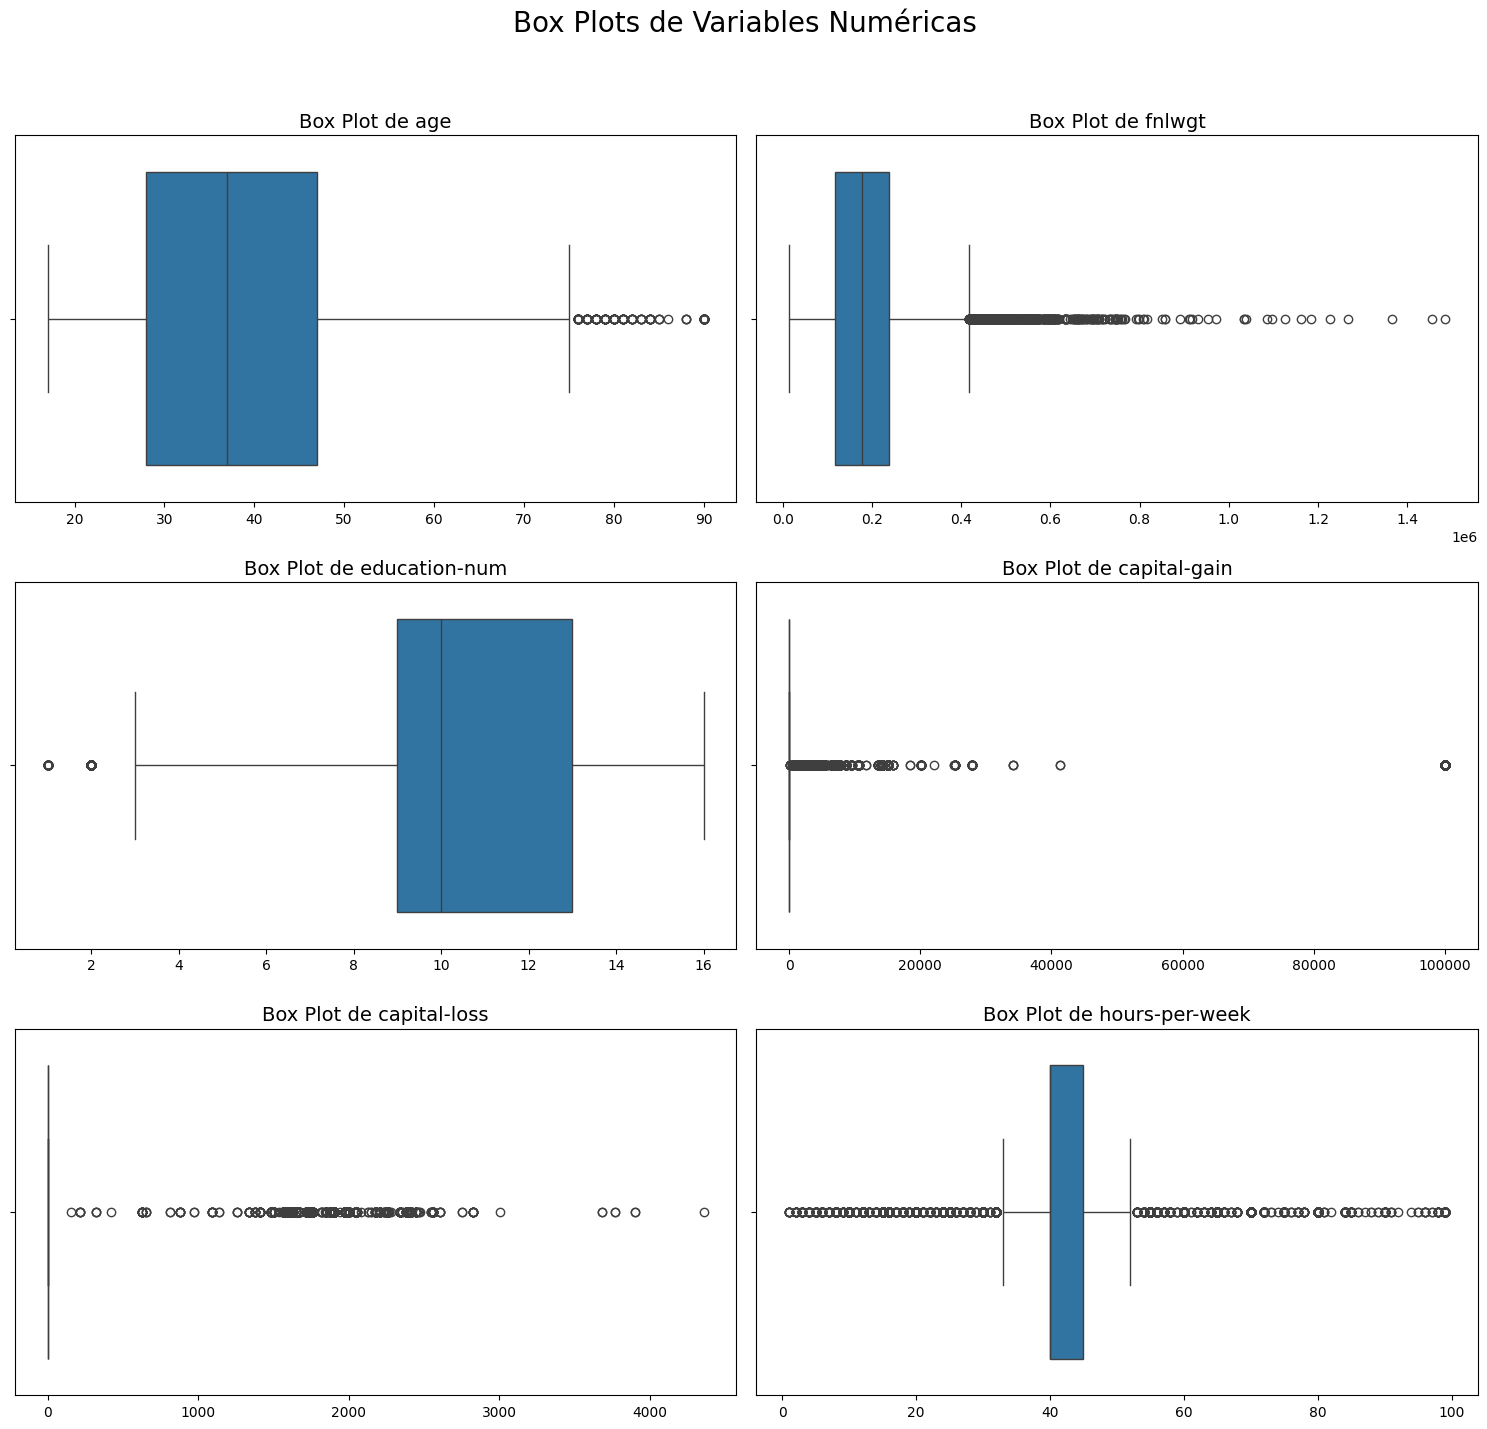

In [70]:

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
fig.suptitle('Box Plots de Variables Numéricas', fontsize=20)
axes = axes.flatten()

for i, col in enumerate(numerical_features):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Box Plot de {col}', fontsize=14)
    axes[i].set_xlabel('')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## Analisis de distribuciones: 

## Analisis univariado:

## Analisis multivariado:

## Relaciones entre variables:

## Construccion de hipotesis iniciales: 

## Visualizaciones clave:

## Insights principales: